<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales. The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
df = pd.read_csv(sac_csv)

In [4]:
# Convert sale_date to Date Time
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [5]:
df['sq__ft'] = df['sq__ft'].astype(float)
df['price'] = df['price'].astype(float)

In [6]:
#NO NULL VALUES
df.isnull().values.any()

False

In [7]:
## DROP 0 Bed, 0 Bath, and 0 Sq__ft
df = df.drop(df[(df.beds == 0) & (df.baths == 0) & (df.sq__ft == 0)].index)

In [8]:
df[df.street.str.contains('DANBROOK')]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984.0,Condo,2008-05-16,-210944.0,-121.503471,38.668433


In [9]:
#FIX DANBROOK
df.loc[703,'sq__ft']=984.0
df.loc[703,'price'] = 210944.0
df.loc[703,'longitude'] = -121.503
df.loc[703,'latitude'] = 38.6684

In [10]:
df[df.street.str.contains('DANBROOK')]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,984.0,Condo,2008-05-16,210944.0,38.6684,-121.503


In [11]:
df[df['sq__ft'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0.0,Residential,2008-05-21,352000.0,38.691299,-121.081752
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0.0,Residential,2008-05-21,600000.0,38.672761,-121.050378
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0.0,Residential,2008-05-21,606238.0,38.666807,-121.064830
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0.0,Residential,2008-05-21,830000.0,38.669931,-121.059580
223,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0.0,Residential,2008-05-20,201000.0,38.694052,-120.995589
224,1636 ALLENWOOD CIR,LINCOLN,95648,CA,4,2,0.0,Residential,2008-05-20,202500.0,38.879192,-121.309477
227,2370 BIG CANYON CREEK RD,PLACERVILLE,95667,CA,3,2,0.0,Residential,2008-05-20,205000.0,38.744580,-120.794254
230,3361 BOW MAR CT,CAMERON PARK,95682,CA,2,2,0.0,Residential,2008-05-20,210000.0,38.694370,-120.996602
262,632 NEWBRIDGE LN,LINCOLN,95648,CA,4,2,0.0,Residential,2008-05-20,261800.0,38.879084,-121.298586
278,1102 CHESLEY LN,LINCOLN,95648,CA,4,4,0.0,Residential,2008-05-20,297500.0,38.864864,-121.313988


In [12]:
## DROP SQ__FT = 0
df = df.drop(df[df['sq__ft']==0].index)

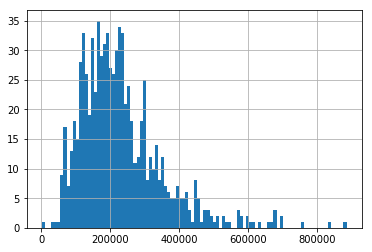

In [13]:
df['price'].hist(bins=100)

In [14]:
df.sort_values('price', ascending=True).head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822.0,Residential,2008-05-16,2000.0,38.490447,-121.129337
603,8208 WOODYARD WAY,CITRUS HEIGHTS,95621,CA,3,2,1166.0,Residential,2008-05-16,30000.0,38.715322,-121.314787
335,5840 WALERGA RD,SACRAMENTO,95842,CA,2,1,840.0,Condo,2008-05-19,40000.0,38.673678,-121.357471
336,923 FULTON AVE,SACRAMENTO,95825,CA,1,1,484.0,Condo,2008-05-19,48000.0,38.582279,-121.401482
605,15 LOORZ CT,SACRAMENTO,95823,CA,2,1,838.0,Residential,2008-05-16,55422.0,38.471646,-121.435158


In [15]:
df = df.drop(df[df['price']==2000].index)

### PLOTS

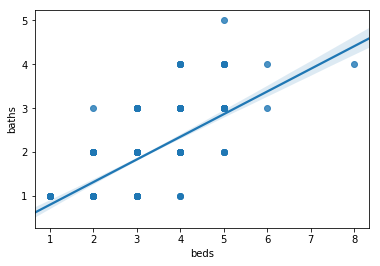

In [16]:
ax = sns.regplot(x='beds', y='baths', data=df) # BED BATH

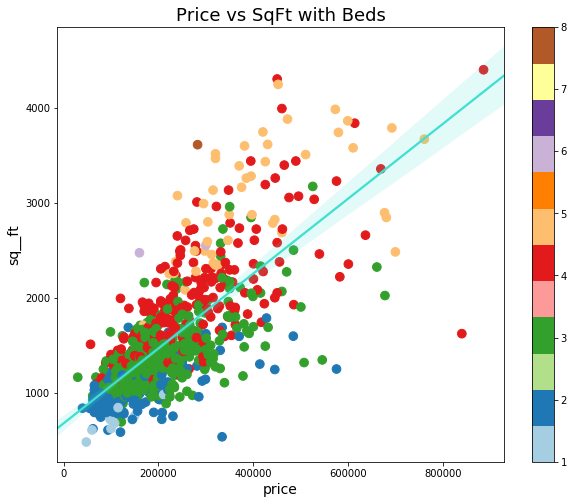

In [17]:
fig, ax = plt.subplots(figsize=(10,8))

points = ax.scatter(df["price"], df["sq__ft"], c=df["beds"], s=75, cmap="Paired")
plt.colorbar(points)

ax.set_title('Price vs SqFt with Beds', fontsize=18)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Sq Ft',fontsize=14)

sns.regplot("price", "sq__ft", data=df, scatter=False, color="turquoise")

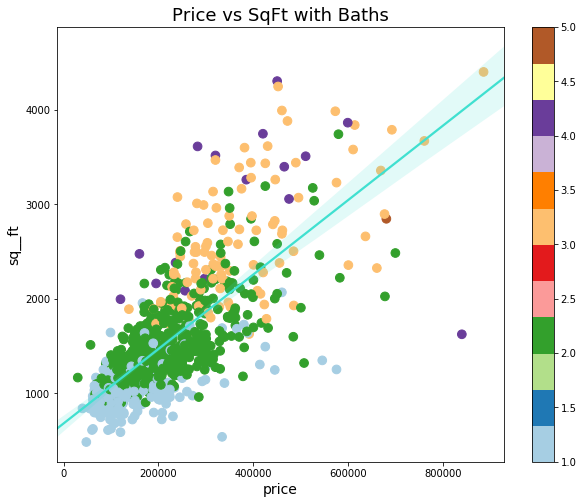

In [18]:
fig, ax = plt.subplots(figsize=(10,8))

points = ax.scatter(df["price"], df["sq__ft"], c=df["baths"], s=75, cmap="Paired")
plt.colorbar(points)

ax.set_title('Price vs SqFt with Baths', fontsize=18)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Sq Ft',fontsize=14)

sns.regplot("price", "sq__ft", data=df, scatter=False, color="turquoise")

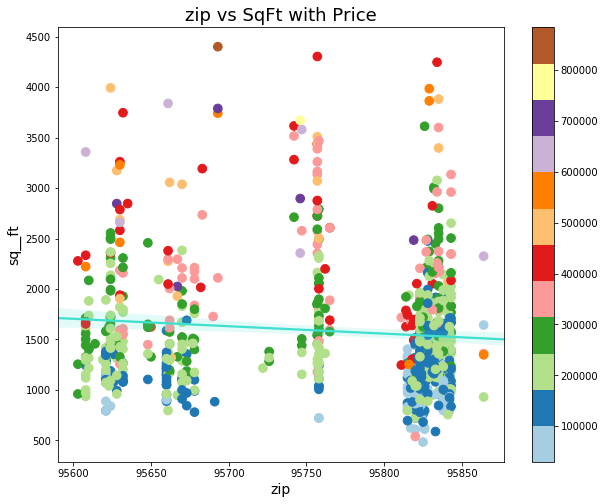

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

points = ax.scatter(df["zip"], df["sq__ft"], c=df["price"], s=75, cmap="Paired")
plt.colorbar(points)

ax.set_title('zip vs SqFt with Price', fontsize=18)
ax.set_xlabel('zip', fontsize=14)
ax.set_ylabel('Sq Ft',fontsize=14)

sns.regplot("zip", "sq__ft", data=df, scatter=False, color="turquoise")

In [20]:
## "BINARIZE" THE CITY
citylist = df.city.unique().tolist()

In [21]:
## Add citylist_index into DF
f = lambda x: citylist.index(x)
df['city_index'] = df['city'].apply(f)


In [22]:
df[df['sq__ft'] > 3500].head(8).sort_values('sq__ft',ascending=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,city_index
151,6503 RIO DE ONAR WAY,ELK GROVE,95757,CA,5,4,3508.0,Residential,2008-05-21,510000.0,38.382530,-121.428038,6
120,4359 CREGAN CT,RANCHO CORDOVA,95742,CA,5,4,3516.0,Residential,2008-05-21,320000.0,38.545128,-121.224922,1
137,5579 JERRY LITELL WAY,SACRAMENTO,95835,CA,5,3,3599.0,Residential,2008-05-21,381300.0,38.677126,-121.500519,0
108,2912 NORCADE CIR,SACRAMENTO,95826,CA,8,4,3612.0,Multi-Family,2008-05-21,282400.0,38.559505,-121.364839,0
146,4186 TULIP PARK WAY,RANCHO CORDOVA,95742,CA,5,3,3615.0,Residential,2008-05-21,430000.0,38.550617,-121.235260,1
307,1092 MAUGHAM CT,GALT,95632,CA,5,4,3746.0,Residential,2008-05-20,420000.0,38.271646,-121.286848,8
319,5559 NORTHBOROUGH DR,SACRAMENTO,95835,CA,5,3,3881.0,Residential,2008-05-20,471750.0,38.677225,-121.519687,0
317,9760 LAZULITE CT,ELK GROVE,95624,CA,4,3,3992.0,Residential,2008-05-20,460000.0,38.403609,-121.335541,6


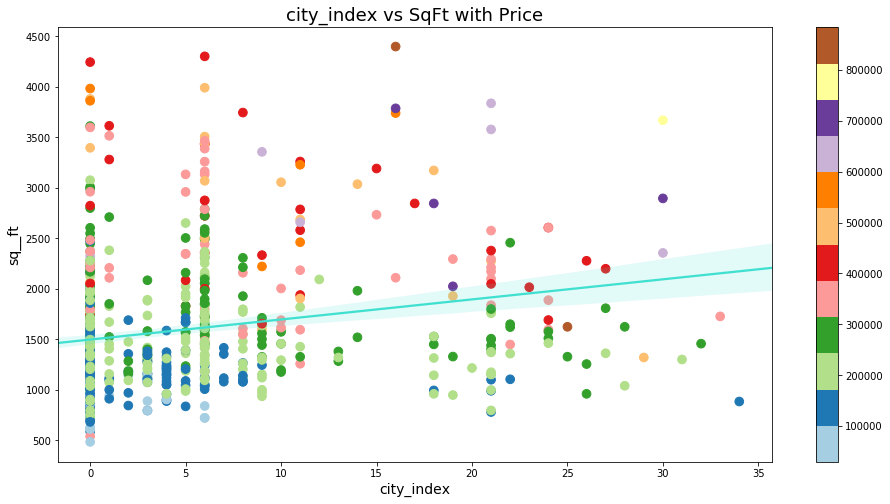

In [23]:
fig, ax = plt.subplots(figsize=(16,8))

points = ax.scatter(df["city_index"], df["sq__ft"], c=df["price"], s=75, cmap="Paired")
plt.colorbar(points)

ax.set_title('city_index vs SqFt with Price', fontsize=18)
ax.set_xlabel('city_index', fontsize=14)
ax.set_ylabel('Sq Ft',fontsize=14)

sns.regplot("city_index", "sq__ft", data=df, scatter=False, color="turquoise")

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [24]:
# A , CITY, SQ__FT

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [25]:
# A:  SQ__FT

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

**TIP: you can use scipy.stats.pearsonr to get the intercept**

In [26]:
# A:
m,b = np.polyfit(df['sq__ft'], df['price'], 1) 

print('Slope: {}'.format(m))
print('Y Intercept: {}'.format(b))
print('Y = {0}X + {1}'.format(m, b))

Slope: 134.640839937
Y Intercept: 16195.5455964
Y = 134.640839937X + 16195.5455964


In [27]:
x_topredict = 3610

xs=np.array(df['sq__ft'],dtype=np.float64)
ys=np.array(df['price'],dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
        ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    b=np.mean(ys) - m*np.mean(xs)
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)
#y_topredict=float(m*x_topredict+b)
print(m,b)
y_topredict=float(m*x_topredict+b)
print(m,b)
print 'if x =',x_topredict,'y is ',y_topredict

(134.64083993681112, 16195.545596351672)
(134.64083993681112, 16195.545596351672)
if x = 3610 y is  502248.977768


In [28]:
regression_line=[(m*x)+b for x in xs]
#regression_line

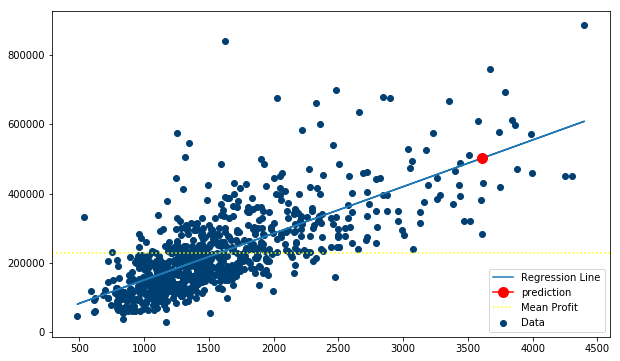

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(xs,ys,color='#003F72',label='Data')
plt.plot(xs,regression_line,label='Regression Line')
plt.plot(x_topredict, y_topredict, marker='o',markersize=10,color="red", label='prediction')
plt.axhline(y=np.mean(ys),linestyle=':',color='yellow',label='Mean Profit')
plt.legend(loc=4)
plt.show()

## SK LEARN - LASSO Regression to Find best Features to predict Price

In [119]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.drop(['price','street','city','state','type','sale_date'], axis=1).values)
scaled_target = StandardScaler().fit_transform(df[['price']])
#scaled_target = df['price'].values.reshape(-1,1)

In [120]:
scaled_features.max()

6.543477385075597

In [121]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import Lasso

In [122]:
X = scaled_features
y = scaled_target

In [123]:
#Xs=np.array(X,dtype=np.float64)
#ys=np.array(y,dtype=np.float64)

In [124]:
len(X)

813

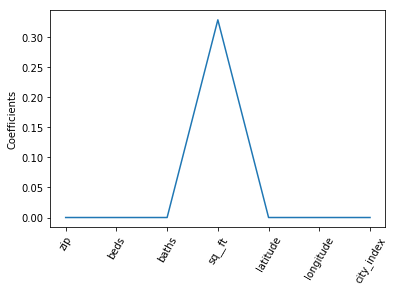

In [138]:
df2 = df.drop(['price','street','city','state', 'type','sale_date'], axis=1)

lasso = Lasso(alpha=0.4)

lasso_coef = lasso.fit(X, y).coef_

_ = plt.plot(range(len(df2.columns)), lasso_coef)

_ = plt.xticks(range(len(df2.columns)), df2.columns, rotation=60)

_ = plt.ylabel('Coefficients')

plt.show()

## SKLEARN

In [ ]:
# X = df2.iloc[:, :-1].values  
# y = df2.iloc[:, 1].values  

In [ ]:
X = df.drop(['price','street','city','state', 'zip', 'type','sale_date','latitude','longitude'], axis=1)
y = df[['price']]

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  
# Train the model using the training sets
regr.fit(X_train, y_train)  

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[0][idx]))

In [ ]:
intercept = regr.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
regr.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = regr.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

In [ ]:
import math

math.sqrt(regression_model_mse)

In [ ]:
# 146	4186 TULIP PARK WAY	RANCHO CORDOVA	95742	CA	5	3	3615.0	Residential	2008-05-21	430000.0	38.550617	-121.235260	1

The coefficient for beds is 5.34384765034e-11
The coefficient for baths is -2.79024681774e-11
The coefficient for sq__ft is 7.63663474574e-15
The coefficient for city_index is 1.20671074397e-13

In [ ]:
regr.predict([[5, 3, 3615, 1]])

### 6. Interpret the intercept. Interpret the slope.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [ ]:
# A: